# Analysis of the SisFall Dataset for Fall Detection
## Matthew Johnson
##### July 25, 2018 (last updated August 24, 2018)

#### A dataset of performed trials of activities of daily living (ADLs) and falls with subjects wearing two triaxis accelerometers and a gyroscope.

SisFall Dataset: http://sistemic.udea.edu.co/en/investigacion/proyectos/english-falls/<br>
##### Sources: <br>
* [1] **Automatic Fall Monitoring: A Review**<br>
  *Natthapon Pannurat, Surapa Thiemjarus, and Ekawit Nantajeewarawat*
* [2] **Real-life/real-time elderly fall detection with a triaxial accelerometer**<br>
 *A. Sucerquia, J.D. López and J.F. Vargas-Bonilla*
* [3] **SisFall: A Fall and Movement Dataset**<br>
 *A. Sucerquia, J.D. López and J.F. Vargas-Bonilla*
* [4] **Fall-Detection Algorithm Using 3-Axis Acceleration: Combination with Simple Threshold and Hidden Markov Model**<br>
 *Dongha Lim, Chulho Park, Nam Ho Kim, Sang-Hoon Kim, and Yun Seop Yu*

![Image](https://i.imgur.com/yJieKKw.png)

## Activities of Daily Living (ADLs):

-----------

| Code | Activity | # trials | length of trial |
---|---|---
| D01  | Walking slowly | 1      | 100s     |
| D02  | Walking quickly | 1      | 100s     |
| D03  | Jogging slowly | 1      | 100s     |
| D04  | Jogging quickly | 1      | 100s     |
| D05  | Walking upstairs and downstairs slowly | 5      | 25s      |
| D06  | Walking upstairs and downstairs quickly | 5      | 25s      |
| D07  | Slowly sit in a half height chair, wait a moment, and up slowly | 5      | 12s      |
| D08  | Quickly sit in a half height chair, wait a moment, and up quickly | 5      | 12s|
| D09  | Slowly sit in a low height chair, wait a moment, and up slowly | 5      | 12s      |
| D10  | Quickly sit in a low height chair, wait a moment, and up quickly| 5      | 12s      |
| D11  | Sitting a moment, trying to get up, and collapse into a chair| 5      | 12s      |
| D12  | Sitting a moment, lying slowly, wait a moment, and sit again | 5      | 12s      |
| D13  | Sitting a moment, lying quickly, wait a moment, and sit again | 5      | 12s      |
| D14  | Being on oneís back change to lateral position, wait a moment, and change to oneís back  | 5      | 12s      |
| D15  | Standing, slowly bending at knees, and getting up | 5      | 12s      |
| D16  | Standing, slowly bending without bending knees, and getting up | 5      | 12s      |
| D17  | Standing, get into a car, remain seated and get out of the car | 5      | 25s      |
| D18  | Stumble while walking | 5      | 12s      |
| D19  | Gently jump without falling (trying to reach a high object)| 5      | 12s      |

## Falls:

-----------

| Code | Activity | # trials | length of trial |
---|---|---
| F01  | Fall forward while walking caused by a slip| 5      | 15s      |
| F02  | Fall backward while walking caused by a slip| 5      | 15s      |
| F03  | Lateral fall while walking caused by a slip| 5      | 15s      |
| F04  | Fall forward while walking caused by a trip| 5      | 15s      |
| F05  | Fall forward while jogging caused by a trip| 5      | 15s      |
| F06  | Vertical fall while walking caused by fainting | 5      | 15s      |
| F07  | Fall while walking, with use of hands in a table to dampen fall, caused by fainting| 5      | 15s      |
| F08  | Fall forward when trying to get up| 5      | 15s      |
| F10  | Fall forward when trying to sit down | 5      | 15s      |
| F11  | Fall backward when trying to sit down | 5      | 15s      |
| F09  | Lateral fall when trying to get up | 5      | 15s      |
| F12  | Lateral fall when trying to sit down | 5      | 15s      |
| F13  | Fall forward while sitting, caused by fainting or falling asleep| 5      | 15s      |
| F14  | Fall backward while sitting, caused by fainting or falling asleep| 5      | 15s |
| F15  | Lateral fall while sitting, caused by fainting or falling asleep| 5      | 15s      |

#### Subjects SA01-SA09:

-----------

| Subject | Age | Height | Weight | Gender |
---|---|---
| **SA01**    | **26**  | **165**    | **53**     | **F**  |
| SA02    | 23  | 176    | 58.5   | M      |
| SA03    | 19  | 156    | 48     | F      |
| SA04    | 23  | 170    | 72     | M      |
| SA05    | 22  | 172    | 69.5   | M      |
| SA06    | 21  | 169    | 58     | M      |
| SA07    | 21  | 156    | 63     | F      |
| SA08    | 21  | 149    | 41.5   | F      |
| SA09    | 24  | 165    | 64     | M      |

#### For computational reasons I currently only have the first 2 subject's data loaded up:

In [1]:
%load_ext autoreload
%autoreload 2

import sisfall_clean as sf

* 1 to 3 ...
Completed... It took 224.41275191307068 seconds.
Completed... It took 473.7262101173401 seconds.
ADL dataframes: 57 		Fall dataframes: 45
ADL windows: 6630 		Fall windows: 4950
below: 4189
above: 761
len fallTrialList: 225
missed falls: 4
false alarms: 0 : []
COMPLETED


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

adl_df_list = sf.adl_df_list
fall_df_list = sf.fall_df_list
FTL = sf.FTL

## Features:


In [ ]:
# Explain: 
# -what is a[k]? what is a(tilde)[k]? what is C? what is RMS? 
# - where is sliding window mentioned?

I used features common throughout related literature, specifically from [3]:

**Sum Vector Magnitude** = $ C_{1}\left [ k \right ] = RMS(\tilde{a}\left [ k \right ] )=\sqrt{a_{x}^{2}\left [ k \right ] + a_{y}^{2}\left [ k \right ]  + a_{z}^{2}\left [ k \right ] } $ <br><br>

**Sum Vector Magnitude on Horizontal Plane** = $ C_{2}\left [ k \right ] = \sqrt{a_{x}^{2}\left [ k \right ]  + a_{z}^{2}\left [ k \right ] } $ <br><br>

**Angle between z-axis and vertical** = $ C_{4}\left [ k \right ] = atan2( \sqrt{(\tilde{a}_{x}\left [ k \right ] )^{2} + (\tilde{a}_{z}\left [ k \right ] )^{2}}, -\tilde{a}_{y}) $ <br><br>

**Standard deviation magnitude on horizontal plane** = $C_{8}\left [ k \right ] = \sqrt{\sigma_{x}^{2}\left [ k \right ]  + \sigma_{z}^{2}\left [ k \right ] } ; with\ \sigma_{i} = std(\tilde{a_{i}}\left [ k \right ])$ <br><br>

**Standard deviation magnitude** = $C_{9}\left [ k \right ] = \sqrt{\sigma_{x}^{2}\left [ k \right ]  + \sigma_{y}^{2}\left [ k \right ] + \sigma_{z}^{2}\left [ k \right ] }$ <br><br>

**Signal Magnitude Area** = $C_{10}\left [ k \right ] = \frac{1}{N}\left (  \int  |\tilde{a}_{x}\left [ k \right ] |\ dt+  \int |\tilde{a}_{y}\left [ k \right ] |\ dt + \int |\tilde{a}_{z}\left [ k \right ] |\ dt\right )$ <br><br>

**Signal Magnitude Area on horizontal plane** = $C_{11}\left [ k \right ] = \frac{1}{N}\left (  \int  |\tilde{a}_{x}\left [ k \right ] |\ dt + \int |\tilde{a}_{z}\left [ k \right ] |\ dt\right )$ 

## Assessing subject SA01's falls:  
- SA01 is a 26 year old female measuring and weighing 165cm and 53kg respectively.

### plot_trials method

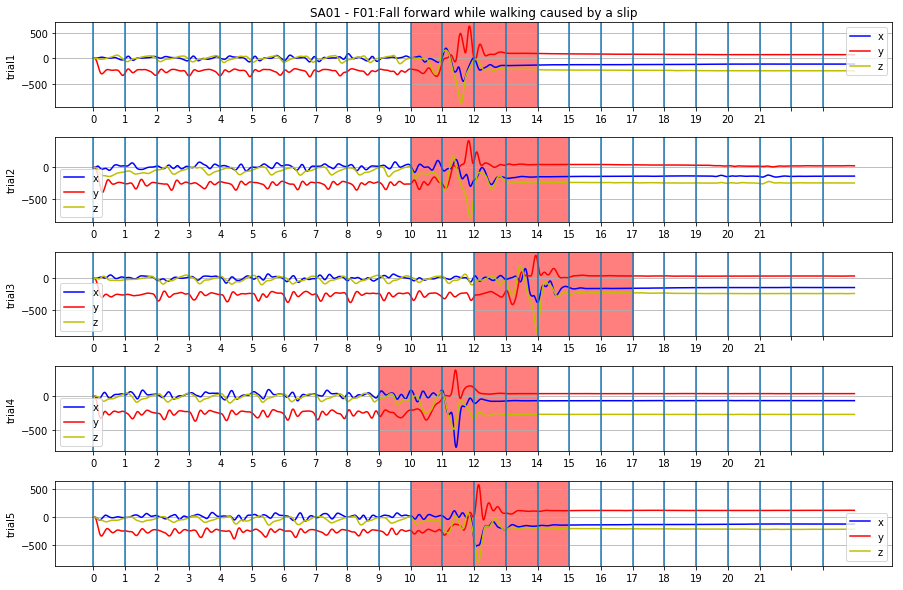

In [3]:
sf.plot_trials(0,0,'f')

### plot_feats method

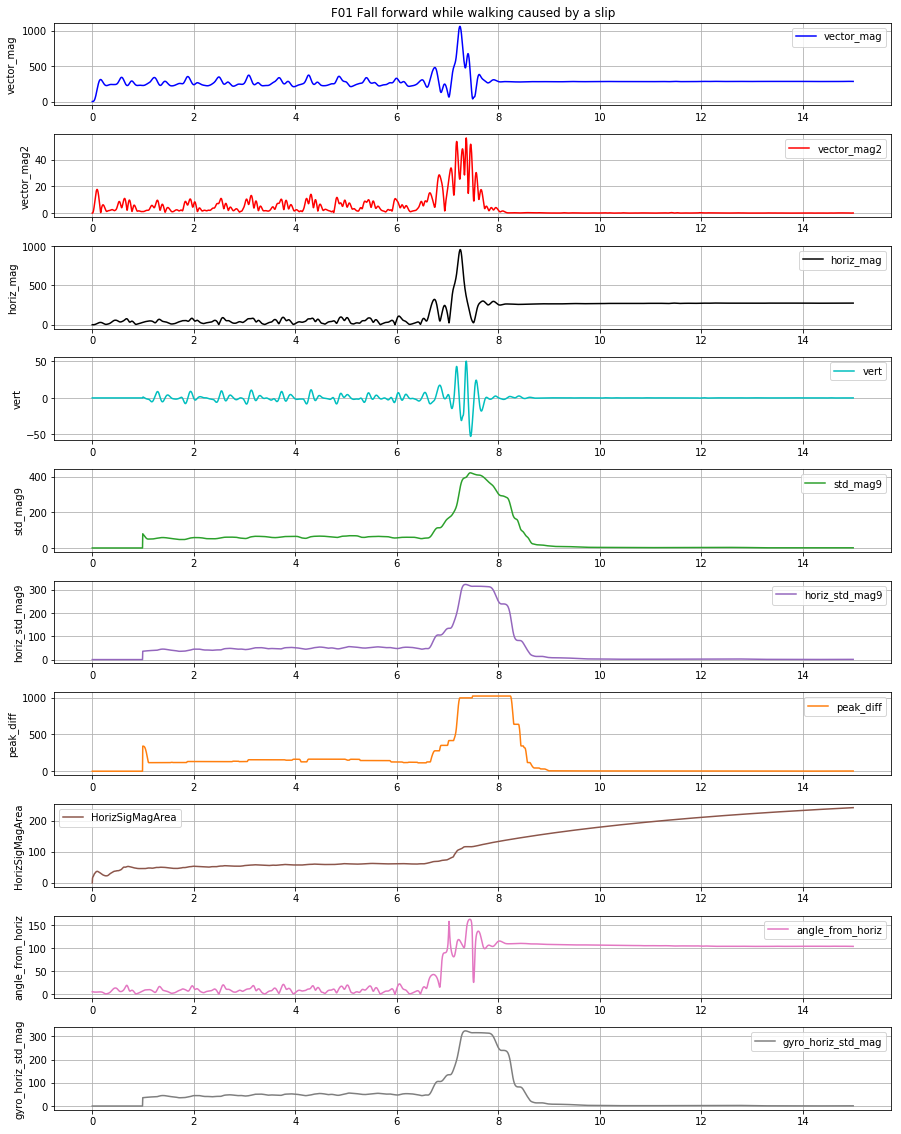

In [4]:
sf.plot_feats(0, 0, 'f')

### plot_one_from_each method

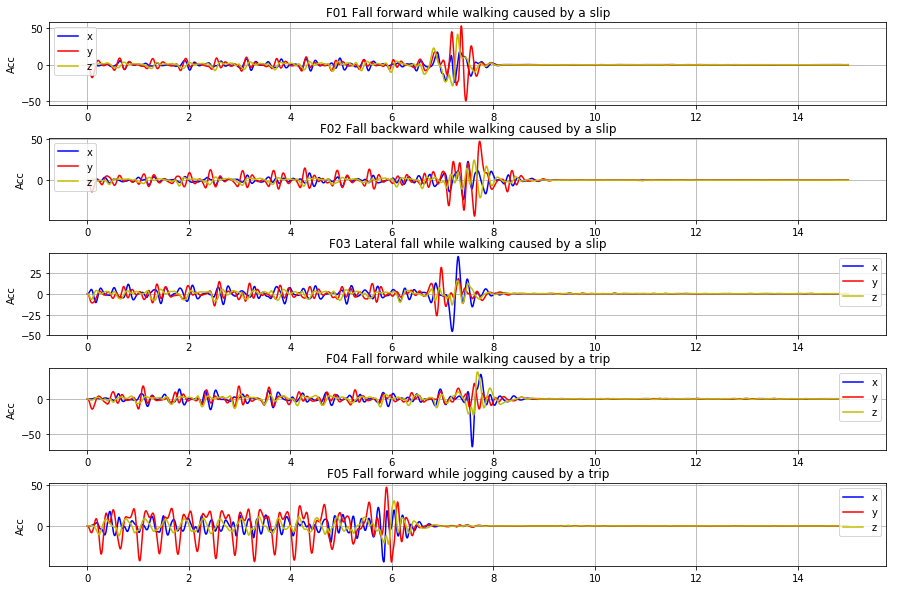

In [5]:
sf.plot_one_from_each(0,'f')

### plotting the rest of subject SA01's falls:

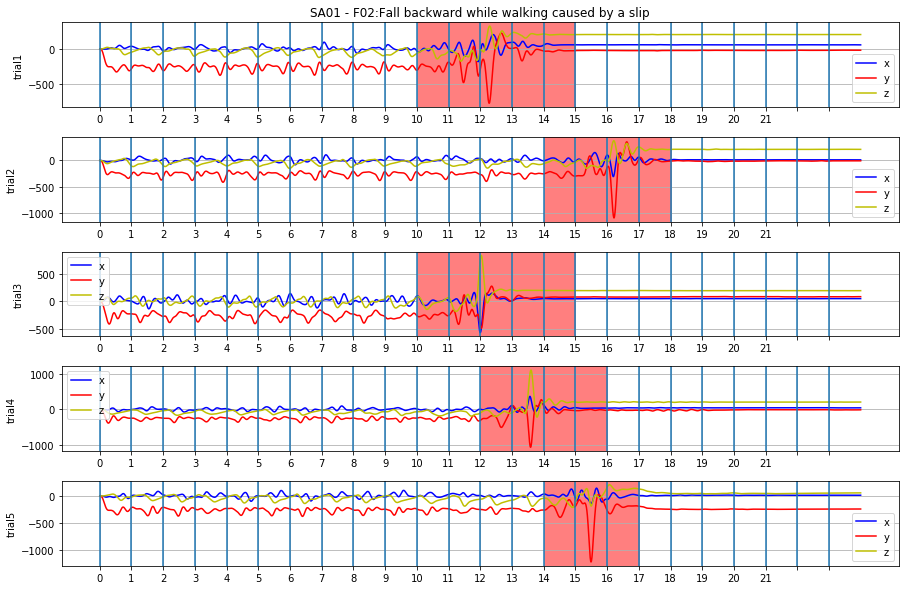

In [6]:
sf.plot_trials(1,0,'f')

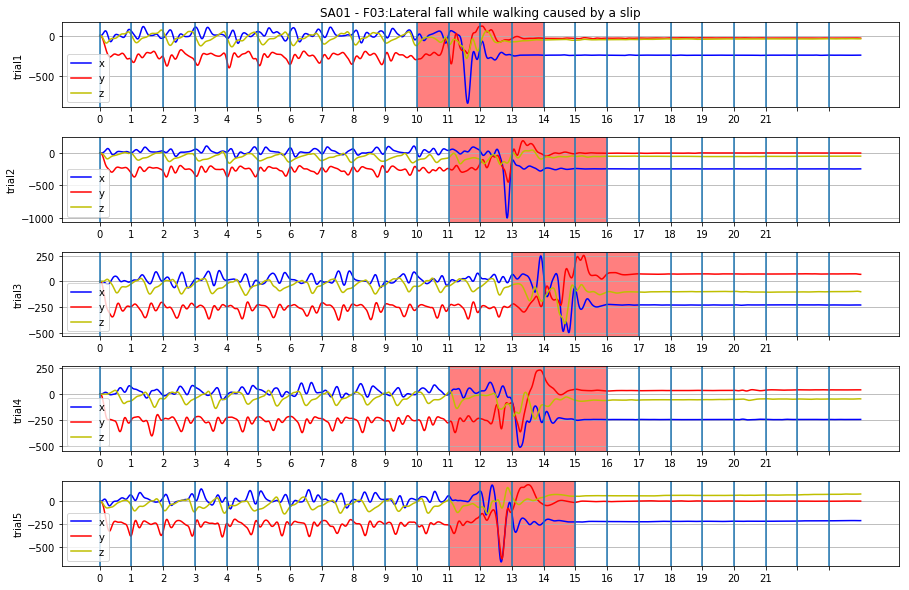

In [7]:
sf.plot_trials(2,0,'f')

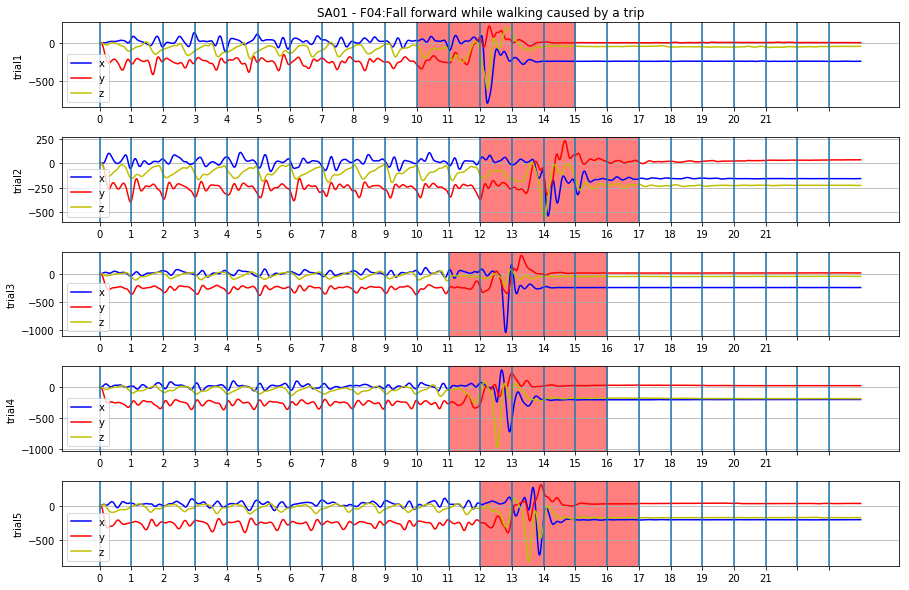

In [8]:
sf.plot_trials(3,0,'f')

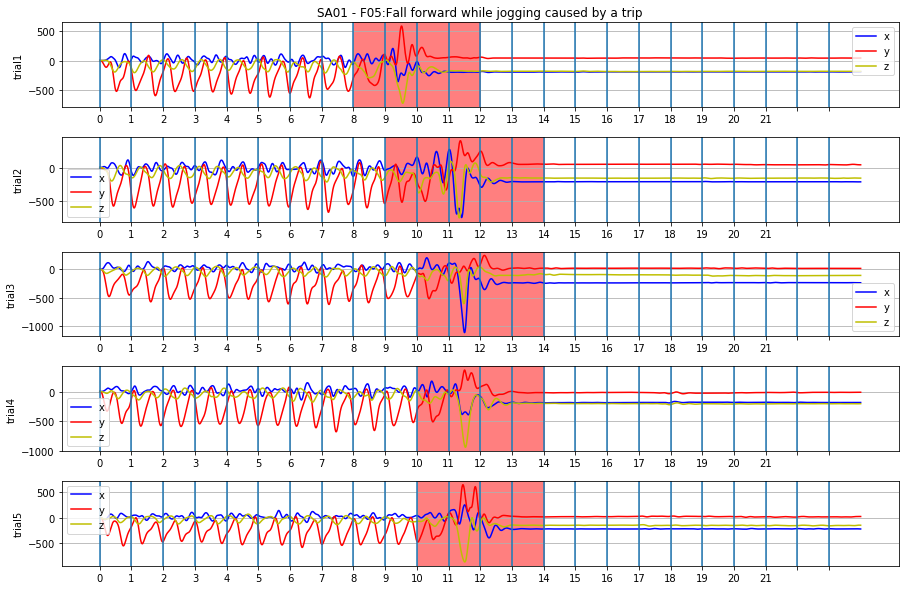

In [9]:
sf.plot_trials(4,0,'f')

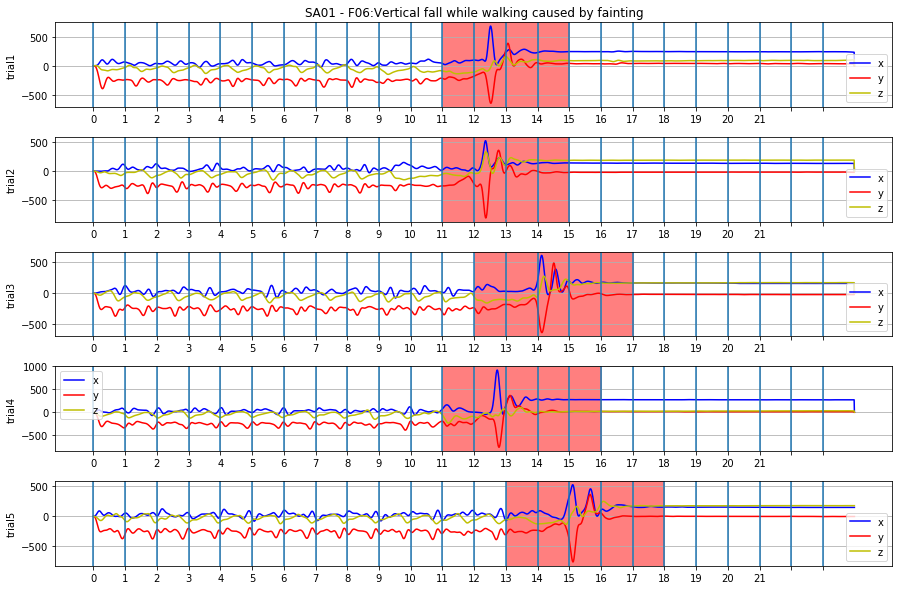

In [10]:
sf.plot_trials(5,0,'f')

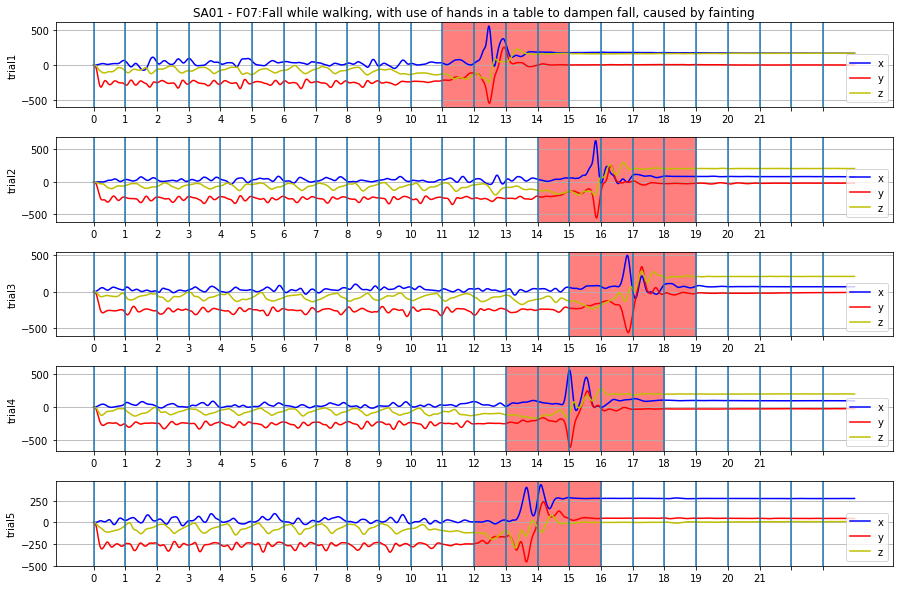

In [11]:
sf.plot_trials(6,0,'f')

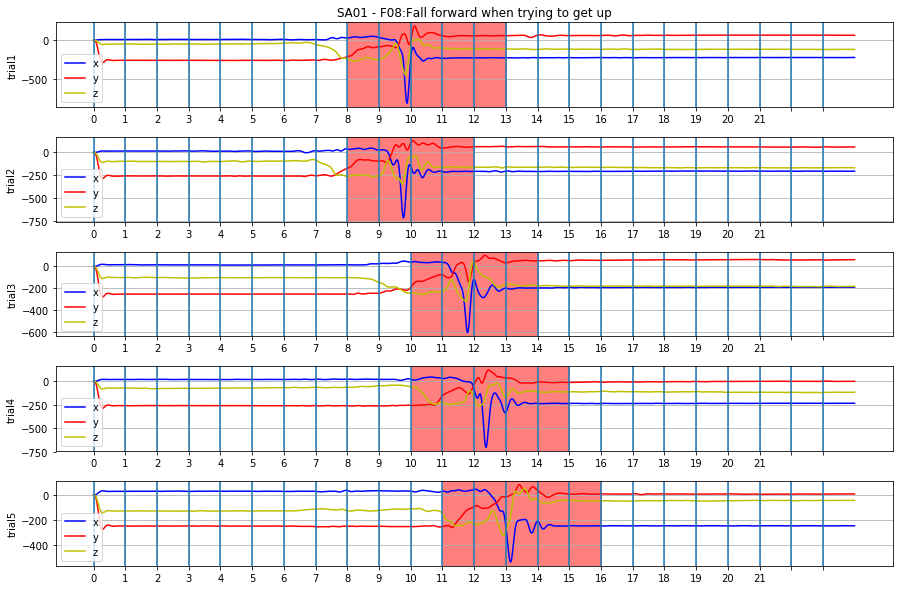

In [12]:
sf.plot_trials(7,0,'f')

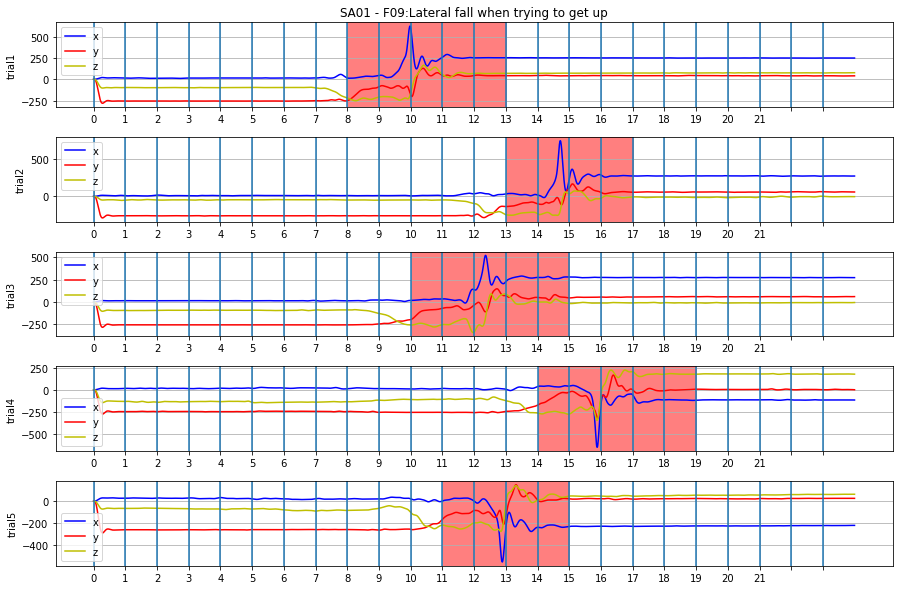

In [13]:
sf.plot_trials(8,0,'f')

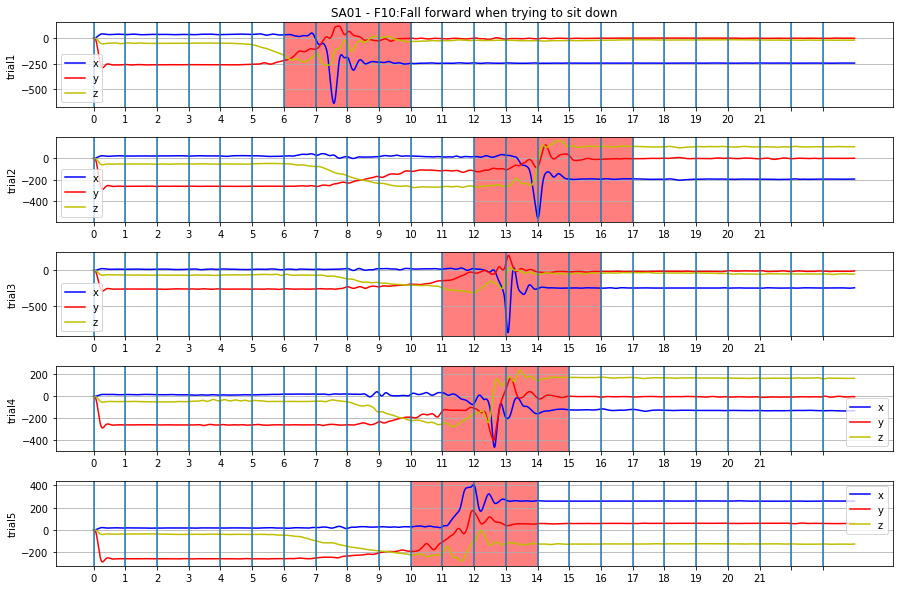

In [14]:
sf.plot_trials(9,0,'f')

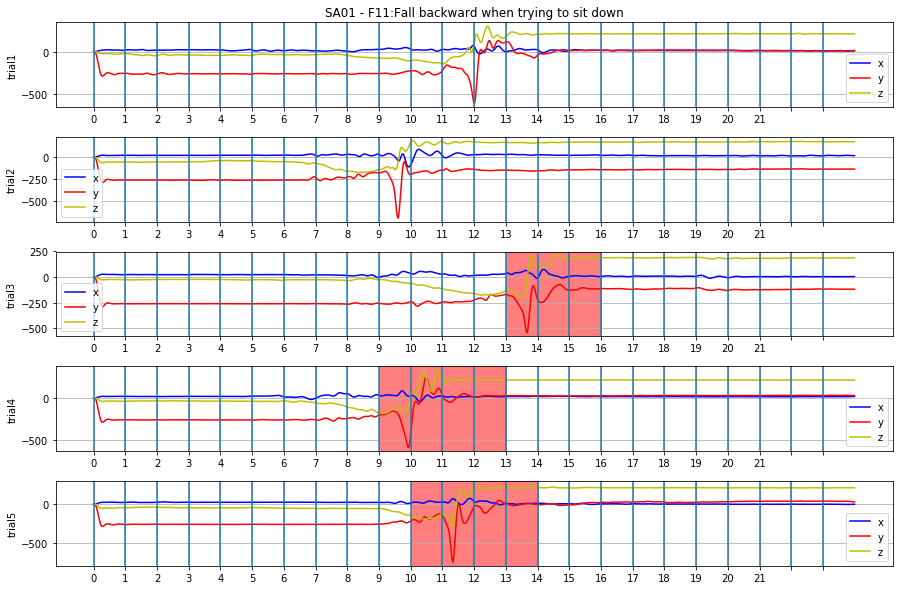

In [15]:
sf.plot_trials(10,0,'f')

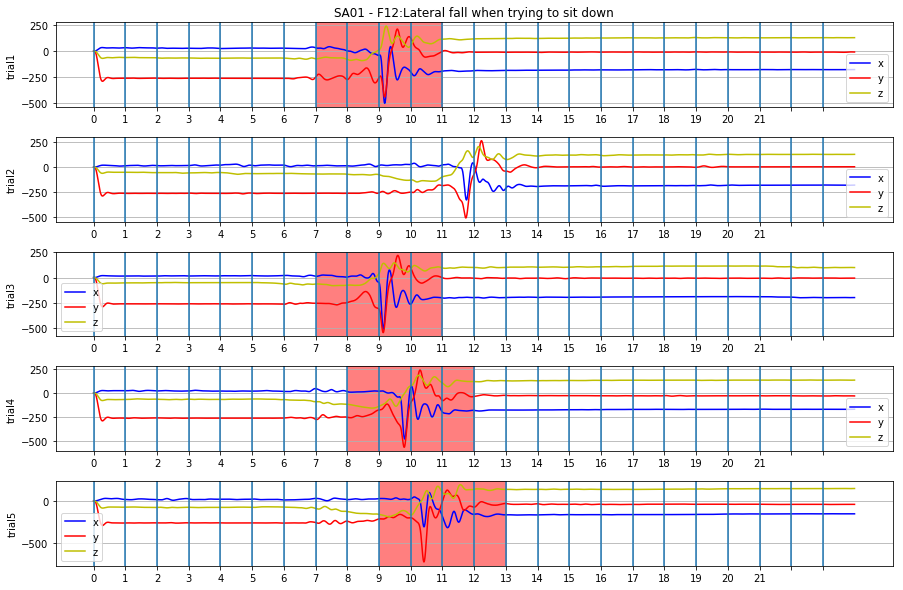

In [16]:
sf.plot_trials(11,0,'f')

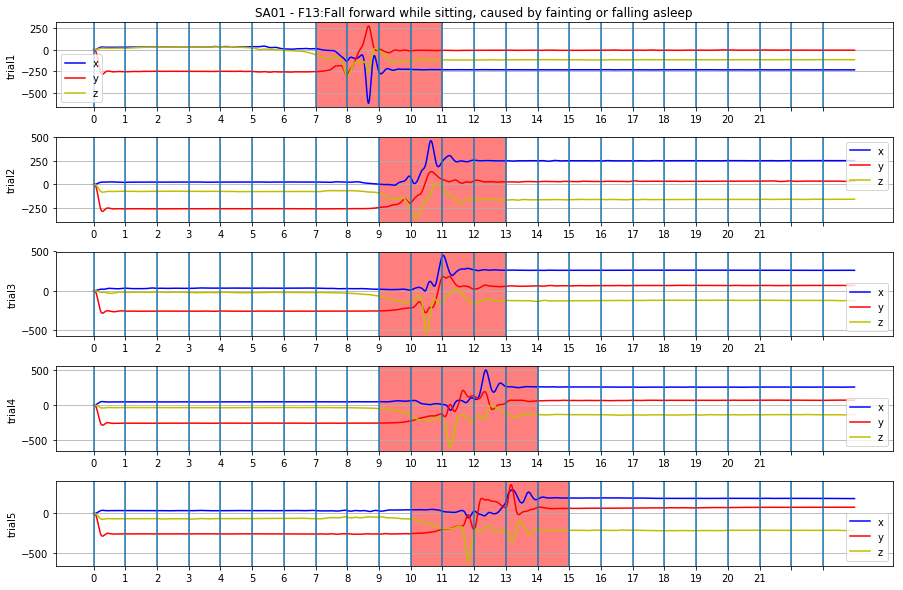

In [17]:
sf.plot_trials(12,0,'f')

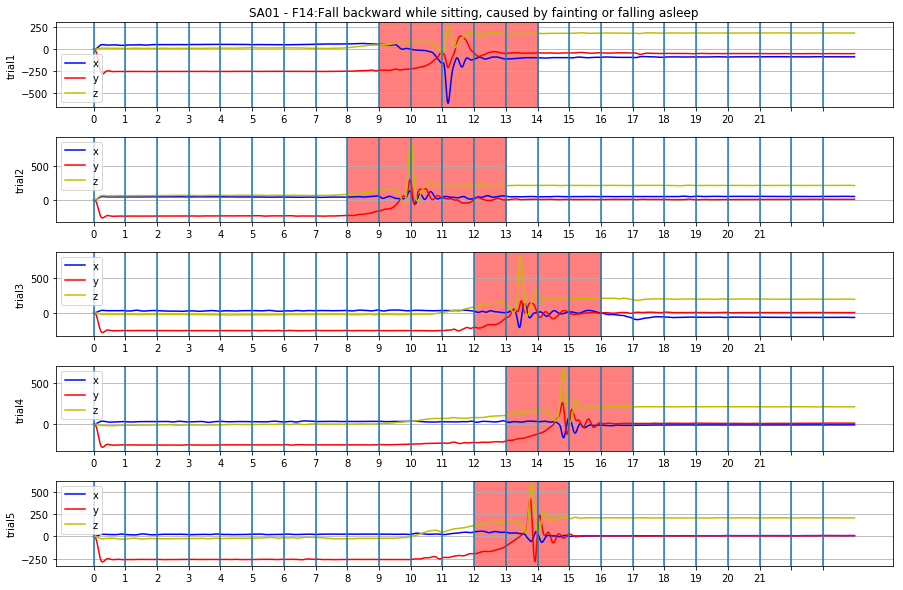

In [18]:
sf.plot_trials(13,0,'f')

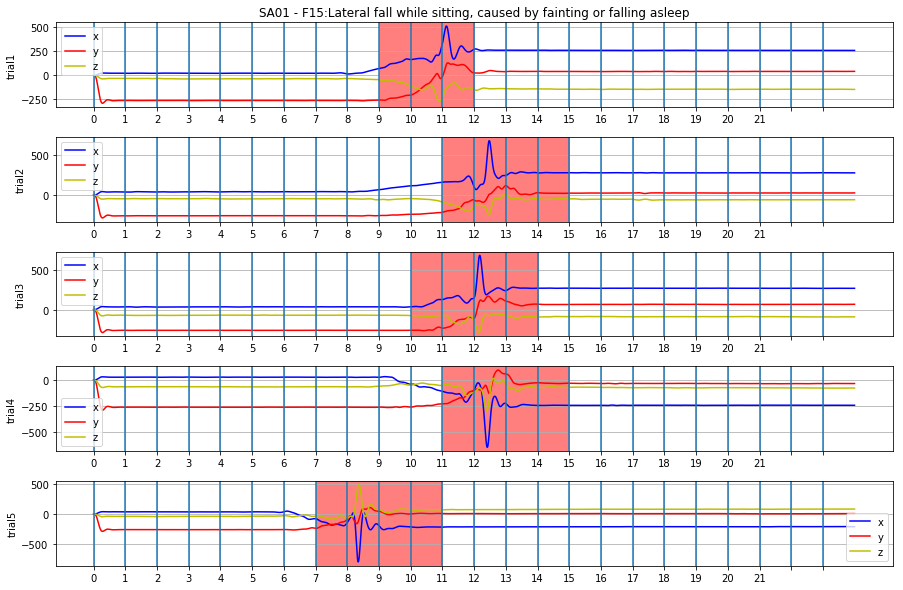

In [19]:
sf.plot_trials(14,0,'f')

In [20]:
import pandas as pd

all_df = pd.concat( [pd.concat(fall_df_list), pd.concat(adl_df_list)], axis=0)
all_df = all_df[['subject', 'activity', 'trial','horiz_std_mag9', 'vector_mag']]
pivot = pd.pivot_table(index=['subject', 'activity', 'trial'], aggfunc=max, data=all_df)

In [21]:
pivot

horiz_std_mag9   vector_mag
subject activity trial                             
SA01    D01      R01         62.999091   387.506803
        D02      R01         89.147400   429.961519
        D03      R01         89.143918   631.528764
        D04      R01        117.528490   744.929436
        D05      R01         51.742472   425.964098
                 R02         45.428847   404.655955
                 R03         42.961860   382.094092
                 R04         44.926579   391.881033
                 R05         40.612289   432.663352
        D06      R01         96.553857   701.881265
                 R02        105.916196   634.623039
                 R03         93.439782   659.653700
                 R04        100.771038   680.182264
                 R05        102.800927   721.384846
        D07      R01         54.472910   294.399501
                 R02         71.940895   311.346285
                 R03         64.126646   315.777426
                 R04         71.766076   306.173050
                 R05         59.283122   323.999882
        D08      R01         69.535884   586.808390
                 R02         66.884996   654.826512
                 R03         70.312222   523.623464
                 R04         60.917614   553.464748
                 R05         61.606206   538.505239
        D09      R01         76.659282   409.872278
                 R02         70.724802   378.424712
                 R03         67.919490   385.739150
                 R04         86.530502   390.451060
                 R05         79.632774   371.339153
        D10      R01         85.530508   491.003112
...                                ...          ...
SA03    F10      R01        158.950091   866.643905
                 R02        166.953411   836.369311
                 R03        157.125758   770.068607
                 R04        178.117264   857.978032
                 R05        120.033504   741.129837
        F11      R01        206.794418   893.767715
                 R02        192.046351  1034.274238
                 R03        198.476855   889.413279
                 R04        187.778853   967.510699
                 R05        191.968623   859.104633
        F12      R01        229.225915   976.465817
                 R02        255.721737   875.604310
                 R03        207.770675   941.661147
                 R04        234.835018   643.101678
                 R05        266.403803   952.527976
        F13      R01        174.459032   559.952280
                 R02        185.791738   609.490779
                 R03        221.025262   615.843625
                 R04        169.810878   675.800812
                 R05        170.435351   677.804323
        F14      R01        168.456978   488.029133
                 R02        210.293377   741.052235
                 R03        200.452808   719.225805
                 R04        229.610960   814.198470
                 R05        181.999129   618.939440
        F15      R01        166.305702   745.610595
                 R02        172.903251   671.152895
                 R03        179.595983   638.415599
                 R04        174.432324   732.457035
                 R05        220.994315   619.906768

[462 rows x 2 columns]

## Correlations

In [ ]:
fall_windows = pd.concat(sf.wList_f)
adl_windows = pd.concat(sf.wList_a)
all_windows = pd.concat([sf.fall_windows, sf.adl_windows])

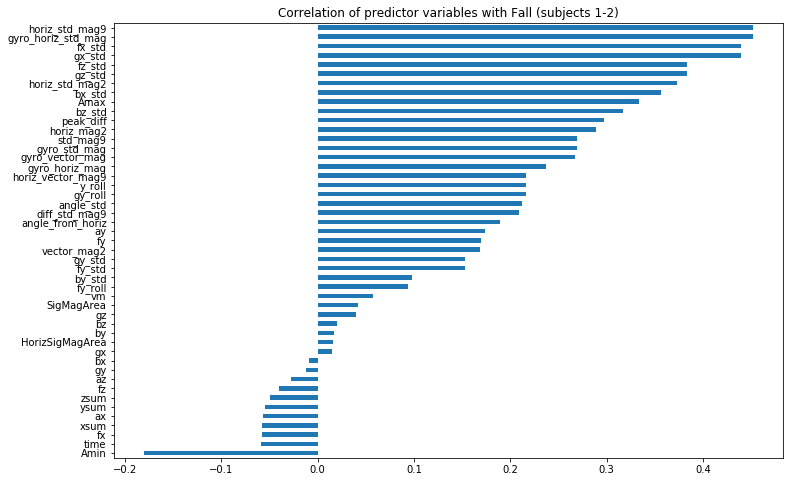

In [24]:
import matplotlib.pyplot as plt

corr = all_windows.corr()['Fall']
corr_rank = corr.sort_values(ascending=False)

plt.subplots(figsize=(12,8))
cr = corr_rank.sort_values(ascending=True)
cr[:-1].plot(kind='barh')
plt.title('Correlation of predictor variables with Fall (subjects 1-2)');